In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [2]:
merged = pd.read_csv("../../data/new_loureiro.csv")
merged

,Time,Energy_1,Energy_2,Energy_3,Energy_4,Energy_5,Energy_6,Energy_7,Energy_8,Energy_9,...,Energy_163,Energy_164,Energy_165,Energy_166,Energy_167,Energy_168,Energy_169,Energy_170,Energy_171,Energy_172
0,2022-05-05 0:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-05-05 0:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-05-05 0:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-05-05 0:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-05-05 10:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46655,2023-09-02 8:45:00,0.041,0.045,0.060,0.055,0.0,NaN,0.012,0.187,0.049,...,0.155,0.003,0.0,0.308,0.046,1.083,0.112,NaN,0.071,0.029
46656,2023-09-02 9:00:00,0.028,0.161,0.072,0.048,0.0,NaN,0.007,0.168,0.049,...,0.195,0.004,0.0,0.119,0.022,1.023,0.121,NaN,0.079,0.060
46657,2023-09-02 9:15:00,0.013,0.037,0.093,0.067,0.0,NaN,0.006,0.150,0.056,...,0.208,0.004,0.0,0.354,0.034,0.833,0.105,NaN,0.093,0.065
46658,2023-09-02 9:30:00,0.010,0.058,0.156,0.028,0.0,NaN,0.007,0.156,0.032,...,0.134,0.003,0.0,0.151,0.027,0.679,0.098,NaN,0.087,0.043


In [3]:
for m in merged.isna().sum():
    if(m > 30000):
        print("35000 missing")

35000 missing
35000 missing
35000 missing
35000 missing
35000 missing
35000 missing
35000 missing
35000 missing
35000 missing


In [4]:
dates = pd.date_range(start="2022-05-05", end="2023-09-03", freq="15T")
dates

DatetimeIndex(['2022-05-05 00:00:00', '2022-05-05 00:15:00',
               '2022-05-05 00:30:00', '2022-05-05 00:45:00',
               '2022-05-05 01:00:00', '2022-05-05 01:15:00',
               '2022-05-05 01:30:00', '2022-05-05 01:45:00',
               '2022-05-05 02:00:00', '2022-05-05 02:15:00',
               ...
               '2023-09-02 21:45:00', '2023-09-02 22:00:00',
               '2023-09-02 22:15:00', '2023-09-02 22:30:00',
               '2023-09-02 22:45:00', '2023-09-02 23:00:00',
               '2023-09-02 23:15:00', '2023-09-02 23:30:00',
               '2023-09-02 23:45:00', '2023-09-03 00:00:00'],
              dtype='datetime64[ns]', length=46657, freq='15T')

In [11]:
merged.Time = pd.to_datetime(merged.Time)
merged

ParserError: hour must be in 0..23: 2022-10-30 24:00:00 present at position 17152

In [10]:
df = merged.sort_values(by='Time')
df = df.iloc[48:,:]
df.reset_index(drop=True, inplace=True)
df

,Time,Energy_1,Energy_2,Energy_3,Energy_4,Energy_5,Energy_6,Energy_7,Energy_8,Energy_9,...,Energy_163,Energy_164,Energy_165,Energy_166,Energy_167,Energy_168,Energy_169,Energy_170,Energy_171,Energy_172
0,2022-05-05 20:00:00,0.095,NaN,0.072,0.052,0.0,NaN,NaN,NaN,NaN,...,NaN,0.004,0.0,NaN,NaN,NaN,0.140,NaN,NaN,0.424
1,2022-05-05 20:15:00,0.104,NaN,0.350,0.039,0.0,NaN,NaN,NaN,NaN,...,NaN,0.004,0.0,NaN,NaN,NaN,0.094,NaN,NaN,0.135
2,2022-05-05 20:30:00,0.140,NaN,0.402,0.039,0.0,NaN,NaN,NaN,NaN,...,NaN,0.003,0.0,NaN,NaN,NaN,0.160,NaN,NaN,0.092
3,2022-05-05 20:45:00,0.110,NaN,0.369,0.045,0.0,NaN,NaN,NaN,NaN,...,NaN,0.004,0.0,NaN,NaN,NaN,0.112,NaN,NaN,0.122
4,2022-05-05 21:00:00,0.122,NaN,0.236,0.064,0.0,NaN,NaN,NaN,NaN,...,NaN,0.004,0.0,NaN,NaN,NaN,0.112,NaN,NaN,0.603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46607,2023-09-02 8:45:00,0.041,0.045,0.060,0.055,0.0,NaN,0.012,0.187,0.049,...,0.155,0.003,0.0,0.308,0.046,1.083,0.112,NaN,0.071,0.029
46608,2023-09-02 9:00:00,0.028,0.161,0.072,0.048,0.0,NaN,0.007,0.168,0.049,...,0.195,0.004,0.0,0.119,0.022,1.023,0.121,NaN,0.079,0.060
46609,2023-09-02 9:15:00,0.013,0.037,0.093,0.067,0.0,NaN,0.006,0.150,0.056,...,0.208,0.004,0.0,0.354,0.034,0.833,0.105,NaN,0.093,0.065
46610,2023-09-02 9:30:00,0.010,0.058,0.156,0.028,0.0,NaN,0.007,0.156,0.032,...,0.134,0.003,0.0,0.151,0.027,0.679,0.098,NaN,0.087,0.043


In [6]:
for m in merged.isna().sum():
    if(m > 45000):
        print("45000 missing")

In [7]:
# variables = {}
# df_notime = df.drop(["Time"], axis=1)
# # Loop through columns and count missing values
# for col in df_notime.columns:
#     missing_count = df_notime[col].isna().sum()
#     variable_name = f'n_{missing_count // 5000 * 5000}to{(missing_count // 5000 + 1) * 5000}'
    
#     # Add the column to the corresponding variable
#     if variable_name not in variables:
#         variables[variable_name] = []
#     variables[variable_name].append(col)

# # Create variables dynamically
# for variable_name, column_names in variables.items():
#     globals()[variable_name] = df_notime[column_names]

In [12]:
weather = pd.read_csv("../../data/weather_aveiro_final.csv")
weather

,Time,Avg_Temp,Avg_Rel_Humidity,Avg_Wind_Direction,Avg_Wind_Speed,Max_Inst_Wind_Speed,Inst_Temp,Quantity_Precip,Max_Inst_Precip,Total_Global_Rad
0,2022-05-05 12:00:00,22.70,62.0,305.0,3.80,5.40,24.40,0.0,0.0,526.00
1,2022-05-05 12:15:00,22.55,63.5,311.5,4.05,5.70,24.55,0.0,0.0,523.35
2,2022-05-05 12:30:00,22.10,64.0,311.0,4.10,6.00,24.80,0.0,0.0,520.00
3,2022-05-05 12:45:00,21.95,62.5,300.0,4.45,6.05,24.90,0.0,0.0,514.40
4,2022-05-05 13:00:00,22.20,62.0,314.0,4.00,5.20,24.90,0.0,0.0,507.00
...,...,...,...,...,...,...,...,...,...,...
46603,2023-09-02 22:45:00,19.25,84.5,281.5,0.95,1.70,21.55,0.0,0.0,0.00
46604,2023-09-02 23:00:00,19.10,82.0,163.0,1.30,2.30,21.50,0.0,0.0,0.00
46605,2023-09-02 23:15:00,19.05,80.0,59.5,1.60,2.45,21.10,0.0,0.0,0.00
46606,2023-09-02 23:30:00,19.30,75.0,26.0,1.10,1.80,20.90,0.0,0.0,0.00


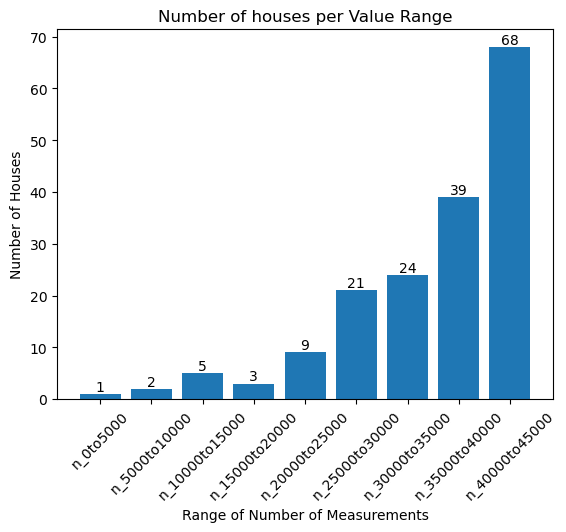

In [18]:
count_dict = {}
df_notime = df.drop(["Time"], axis=1)
# Loop through columns and count missing values
for col in df_notime.columns:
    missing_count = df_notime[col].notnull().sum()
    variable_name = f'n_{missing_count // 5000 * 5000}to{(missing_count // 5000 + 1) * 5000}'
    
    # Increment the count for the corresponding range
    if variable_name not in count_dict:
        count_dict[variable_name] = 0
    count_dict[variable_name] += 1

# Sort by name
sorted_variable_names = sorted(count_dict.keys(), key=lambda x: int(x.split('_')[1].split('to')[0]))

# Create lists to store variable names and their corresponding counts
variable_names = []
counts = []

# Iterate through the count_dict and append the variable names and counts
for variable_name in sorted_variable_names:
    variable_names.append(variable_name)
    counts.append(count_dict[variable_name])

# Create a histogram chart
plt.bar(variable_names, counts)
plt.xlabel('Range of Number of Measurements')
plt.ylabel('Number of Houses')
plt.title('Number of houses per Value Range')

for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.xticks(rotation=45)

# Show the chart
plt.show()

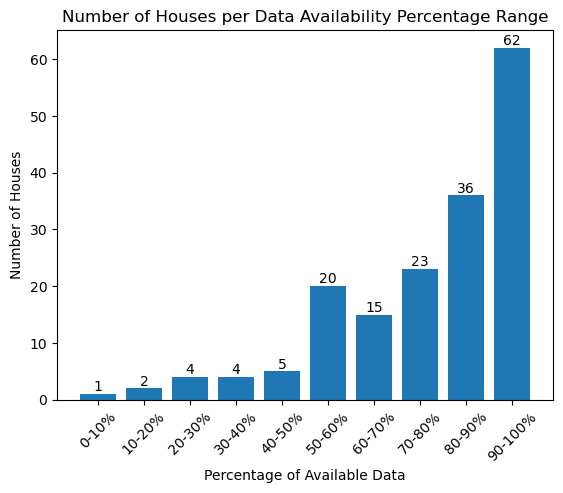

In [14]:
count_dict = {}
df_notime = df.drop(["Time"], axis=1)
df_notime = df_notime.iloc[:-5760,:]

# Get the total number of rows in the DataFrame
total_rows = len(df_notime)

# Loop through columns and count missing values
for col in df_notime.columns:
    missing_count = df_notime[col].notnull().sum()
    
    # Calculate the percentage of available data for the column
    percentage = (missing_count / total_rows) * 100
    variable_name = f'{int(percentage // 10) * 10}-{int(percentage // 10) * 10 + 10}%'
    
    # Increment the count for the corresponding range
    if variable_name not in count_dict:
        count_dict[variable_name] = 0
    count_dict[variable_name] += 1

# Sort by name
sorted_variable_names = sorted(count_dict.keys(), key=lambda x: int(x.split('-')[0]))

# Create lists to store variable names and their corresponding counts
variable_names = []
counts = []

# Iterate through the count_dict and append the variable names and counts
for variable_name in sorted_variable_names:
    variable_names.append(variable_name)
    counts.append(count_dict[variable_name])

# Create a histogram chart
plt.bar(variable_names, counts)
plt.xlabel('Percentage of Available Data')
plt.ylabel('Number of Houses')
plt.title('Number of Houses per Data Availability Percentage Range')

for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.xticks(rotation=45)

# Show the chart
plt.show()

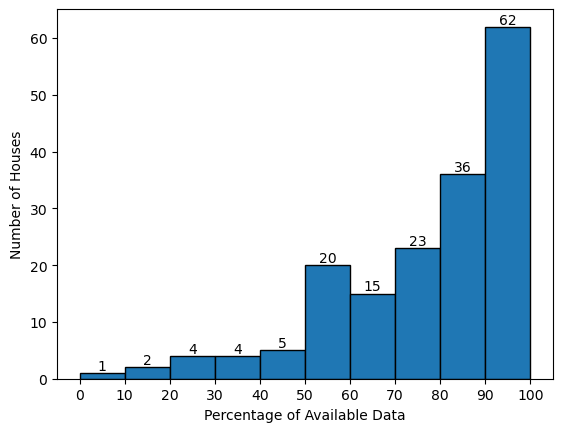

In [15]:
import matplotlib.pyplot as plt

count_dict = {}
df_notime = df.drop(["Time"], axis=1)
df_notime = df_notime.iloc[:-5760,:]

# Get the total number of rows in the DataFrame
total_rows = len(df_notime)

# Loop through columns and count missing values
for col in df_notime.columns:
    missing_count = df_notime[col].notnull().sum()
    
    # Calculate the percentage of available data for the column
    percentage = (missing_count / total_rows) * 100
    
    # Determine the x-axis bin for the current percentage
    bin_value = int(percentage // 10) * 10
    
    # Increment the count for the corresponding range
    if bin_value not in count_dict:
        count_dict[bin_value] = 0
    count_dict[bin_value] += 1

# Sort the x-axis values
sorted_bins = sorted(count_dict.keys())

# Create lists to store x-axis values and their corresponding counts
x_values = []
counts = []

# Iterate through the count_dict and append the x-axis values and counts
for bin_value in sorted_bins:
    x_values.append(bin_value)
    counts.append(count_dict[bin_value])

# Create a histogram chart
plt.bar(x_values, counts, width=10, align='edge', edgecolor='black')
plt.xlabel('Percentage of Available Data')
plt.ylabel('Number of Houses')
#plt.title('Number of Houses per Data Availability Percentage Range')

for x, count in zip(x_values, counts):
    plt.text(x + 5, count, str(count), ha='center', va='bottom')

plt.xticks(range(0, 110, 10))

# Show the chart
plt.show()
